In [1]:
# I use a macro for my frequently used imports - I just retrieve them from store - I never know how my EDA path will look so I import everything I think 
# I will need 

In [2]:
%store -r _importC 

In [3]:
# retrieving Regression imports 

In [4]:
%store -r _importR

In [5]:
# executing Regression imports 

In [6]:
_importR 

In [7]:
# executing Classification imports

In [8]:
_importC

In [9]:
# here is a list of my imports for reference 

In [10]:
print(_importR)
print(_importC)

import numpy as np
import pandas as pd
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import Imputer, OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, learning_curve
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.metrics import reca

In [11]:
# I like to remind myself of my pathway 

In [12]:
pwd 

'/Users/TJR/Desktop/algorithm_projects'

In [13]:
 # lets retrieve the data - assign 'house' to my data - here is the link where you can download the dataset https://wiki.csc.calpoly.edu/datasets/wiki/Houses

In [14]:
house = pd.read_csv('/Users/TJR/Desktop/house_data/RealEstate.csv') 

In [15]:
 # lets take a look at the data .head(10) helps keep things easily viewable 

In [16]:
house.head(10)

MLS            Location     Price  Bedrooms  Bathrooms  Size  \
0  132842       Arroyo Grande  795000.0         3          3  2371   
1  134364         Paso Robles  399000.0         4          3  2818   
2  135141         Paso Robles  545000.0         4          3  3032   
3  135712           Morro Bay  909000.0         4          4  3540   
4  136282  Santa Maria-Orcutt  109900.0         3          1  1249   
5  136431              Oceano  324900.0         3          3  1800   
6  137036  Santa Maria-Orcutt  192900.0         4          2  1603   
7  137090  Santa Maria-Orcutt  215000.0         3          2  1450   
8  137159           Morro Bay  999000.0         4          3  3360   
9  137570          Atascadero  319000.0         3          2  1323   

   Price/SQ.Ft      Status  
0       335.30  Short Sale  
1       141.59  Short Sale  
2       179.75  Short Sale  
3       256.78  Short Sale  
4        87.99  Short Sale  
5       180.50  Short Sale  
6       120.34  Short Sale  
7       148.28  Short Sale  
8       297.32  Short Sale  
9       241.12  Short Sale

In [17]:
# lets start by cleaning up the dataframe - here I lowercase strings

In [18]:
house.columns = map(str.lower, house.columns)

In [19]:
# I call the dataframe often to keep track of how my reorganization looks 

In [20]:
house.head() 

mls            location     price  bedrooms  bathrooms  size  \
0  132842       Arroyo Grande  795000.0         3          3  2371   
1  134364         Paso Robles  399000.0         4          3  2818   
2  135141         Paso Robles  545000.0         4          3  3032   
3  135712           Morro Bay  909000.0         4          4  3540   
4  136282  Santa Maria-Orcutt  109900.0         3          1  1249   

   price/sq.ft      status  
0       335.30  Short Sale  
1       141.59  Short Sale  
2       179.75  Short Sale  
3       256.78  Short Sale  
4        87.99  Short Sale

In [21]:
# lets check out some quick stats on our data - this is most useful for big data - here I tally the values
# get a count for columns
# and check out our features 

In [22]:
print ("Number of observations :: ", len(house.index)) 
print ("Number of columns :: ", len(house.columns)) 
print ("Headers :: ", house.columns.values) 

Number of observations ::  781
Number of columns ::  8
Headers ::  ['mls' 'location' 'price' 'bedrooms' 'bathrooms' 'size' 'price/sq.ft'
 'status']


In [23]:
# I do a quick clean up on feature names 

In [24]:
house.rename(columns ={'size': 'sq_ft', 'price/sq.ft': 'per_sq_ft'}, inplace = True) 

In [25]:
# and check out my dataframe 

In [26]:
house.head() 

mls            location     price  bedrooms  bathrooms  sq_ft  \
0  132842       Arroyo Grande  795000.0         3          3   2371   
1  134364         Paso Robles  399000.0         4          3   2818   
2  135141         Paso Robles  545000.0         4          3   3032   
3  135712           Morro Bay  909000.0         4          4   3540   
4  136282  Santa Maria-Orcutt  109900.0         3          1   1249   

   per_sq_ft      status  
0     335.30  Short Sale  
1     141.59  Short Sale  
2     179.75  Short Sale  
3     256.78  Short Sale  
4      87.99  Short Sale

In [27]:
# I will be predicting housing cost - so lets check out our neighborhoods - I immediately notice some duplicates 

In [28]:
house.location.unique() 

array(['Arroyo Grande', 'Paso Robles', 'Morro Bay', 'Santa Maria-Orcutt',
       'Oceano', 'Atascadero', 'Los Alamos', 'San Miguel',
       'San Luis Obispo', 'Cayucos', 'Pismo Beach', 'Nipomo', 'Guadalupe',
       'Los Osos', 'Templeton', 'Grover Beach', 'Cambria', 'Solvang',
       'Bradley', 'Avila Beach', 'Santa Ynez', 'King City', 'Creston',
       'Lompoc', 'Coalinga', 'Buellton', 'Lockwood', 'Greenfield',
       'Soledad', 'Santa Margarita', 'Bakersfield', 'New Cuyama',
       ' Lompoc', ' Nipomo', ' Arroyo Grande', 'San Simeon', ' Morro Bay',
       ' Pismo Beach', ' Cambria', ' Paso Robles', ' Out Of Area',
       ' Los Osos', ' Santa Maria-Orcutt', ' Grover Beach', ' Templeton',
       ' Atascadero', ' Oceano', ' Cayucos', ' Creston', 'Out Of Area',
       ' San Luis Obispo', ' Solvang', ' Bradley', ' San Miguel'],
      dtype=object)

In [29]:
# here I encounter a problem I have not found a solution for with the notebook - there appears to be a problem with spacing thats inherent to the data from 
# the download source - if you notice, duplicated strings have a space before them - ' arroyo grande' 'arroyo grande' ..etc

In [30]:
# to stay efficient I simply export the dataframe out by .to_csv and edit the spacing error in excel - this will be an interesting edge case to come back to 

In [31]:
house.to_csv('house1.csv') 

In [32]:
 # I assign house to house 

In [33]:
house = pd.read_csv('/Users/TJR/Desktop/house_data/house.csv') 

In [34]:
# and take a look at the edited strings 

In [35]:
house.head(10)

mls       location   price  bedrooms  bathrooms  sq_ft  per_sq_ft  \
0  132842  arroyo_grande  795000         3          3   2371     335.30   
1  154495  arroyo_grande  239800         5          2   1575     152.25   
2  154308  arroyo_grande  250000         1          1    748     334.22   
3  154257  arroyo_grande  400000         3          3   1568     255.10   
4  154201  arroyo_grande  450000         3          2   1916     234.86   
5  153442  arroyo_grande  514900         4          3   2035     253.02   
6  153406  arroyo_grande  419000         2          2   1587     264.02   
7  153133  arroyo_grande  849900         3          4   3375     251.82   
8  152844  arroyo_grande  249250         2          1    728     342.38   
9  152351  arroyo_grande  265000         2          1    972     272.63   

        status  
0   short sale  
1  foreclosure  
2   short sale  
3   short sale  
4   short sale  
5  foreclosure  
6   short sale  
7   short sale  
8   short sale  
9  foreclosure

In [36]:
 # everything looks good 

In [37]:
house.location.unique()

array(['arroyo_grande', 'atascadero', 'avila_beach', 'bakersfield',
       'bradley', 'buellton', 'cambria', 'cayucos', 'coalinga', 'creston',
       'greenfield', 'grover_beach', 'guadalupe', 'king_city', 'lockwood',
       'lompoc', 'los_alamos', 'los_osos', 'morro_bay', 'new_cayuma',
       'nipomo', 'ocean', 'oceano', 'paso_robles', 'pismo_beach',
       'san_luis_obispo', 'san_miguel', 'san_simeon', 'santa_margarita',
       'santa_maria_orcutt', 'santa_ynez', 'soledad', 'solvang',
       'templeton'], dtype=object)

In [38]:
# here I create a series for the mls columns - the reasoning behind this will be explained as my process continues

In [39]:
mls = house.iloc[:,[0]]  
mls.head()

mls
0  132842
1  154495
2  154308
3  154257
4  154201

In [40]:
# lets get rid of some features 

In [41]:
house.drop('status', axis =1, inplace = True) 

In [42]:
house.drop('mls', axis = 1, inplace = True) 

In [43]:
house.head()

location   price  bedrooms  bathrooms  sq_ft  per_sq_ft
0  arroyo_grande  795000         3          3   2371     335.30
1  arroyo_grande  239800         5          2   1575     152.25
2  arroyo_grande  250000         1          1    748     334.22
3  arroyo_grande  400000         3          3   1568     255.10
4  arroyo_grande  450000         3          2   1916     234.86

In [44]:
# reorganizing the order of my columns 

In [45]:
house = house[['location','bedrooms','bathrooms', 'sq_ft','per_sq_ft','price']] 

In [46]:
# checking out how everthing looks 

In [47]:
house.head() 

location  bedrooms  bathrooms  sq_ft  per_sq_ft   price
0  arroyo_grande         3          3   2371     335.30  795000
1  arroyo_grande         5          2   1575     152.25  239800
2  arroyo_grande         1          1    748     334.22  250000
3  arroyo_grande         3          3   1568     255.10  400000
4  arroyo_grande         3          2   1916     234.86  450000

In [48]:
# customary correlation matrix to be sure my features influence the price 

In [49]:
house.corr() 

bedrooms  bathrooms     sq_ft  per_sq_ft     price
bedrooms   1.000000   0.587521  0.595062  -0.156080  0.249110
bathrooms  0.587521   1.000000  0.760886   0.078036  0.518152
sq_ft      0.595062   0.760886  1.000000   0.095117  0.662065
per_sq_ft -0.156080   0.078036  0.095117   1.000000  0.682337
price      0.249110   0.518152  0.662065   0.682337  1.000000

In [50]:
# lets visualize the data on a scatter plot with regression line to check out the linear trend 

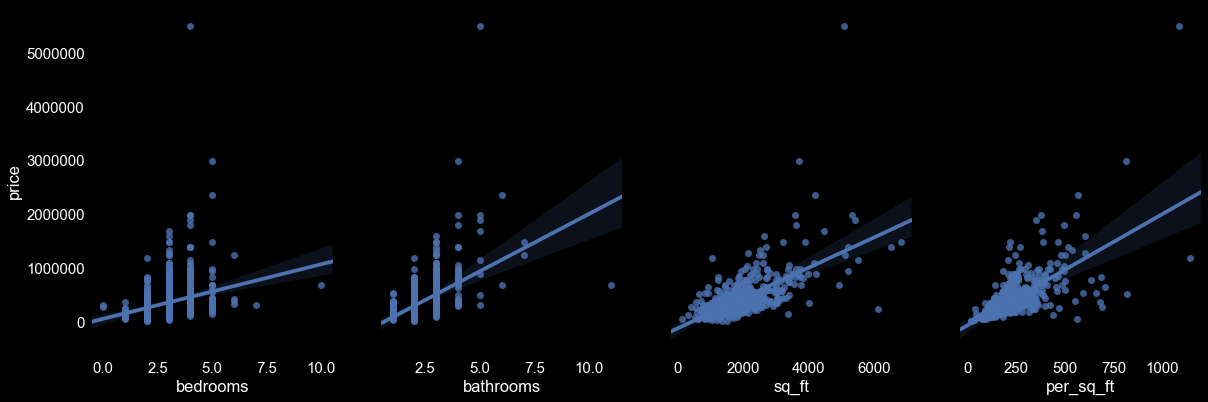

In [93]:
sns.set_style({'axes.facecolor':'black',  'axes.labelcolor': 'white','axes.grid': False,'figure.facecolor':'black','text.color': 'white','xtick.color': 'white', 
               'ytick.color':'white'})
pair = sns.pairplot(house, x_vars=['bedrooms','bathrooms','sq_ft','per_sq_ft'], y_vars=['price'], size=6, aspect=0.7, kind='reg') 

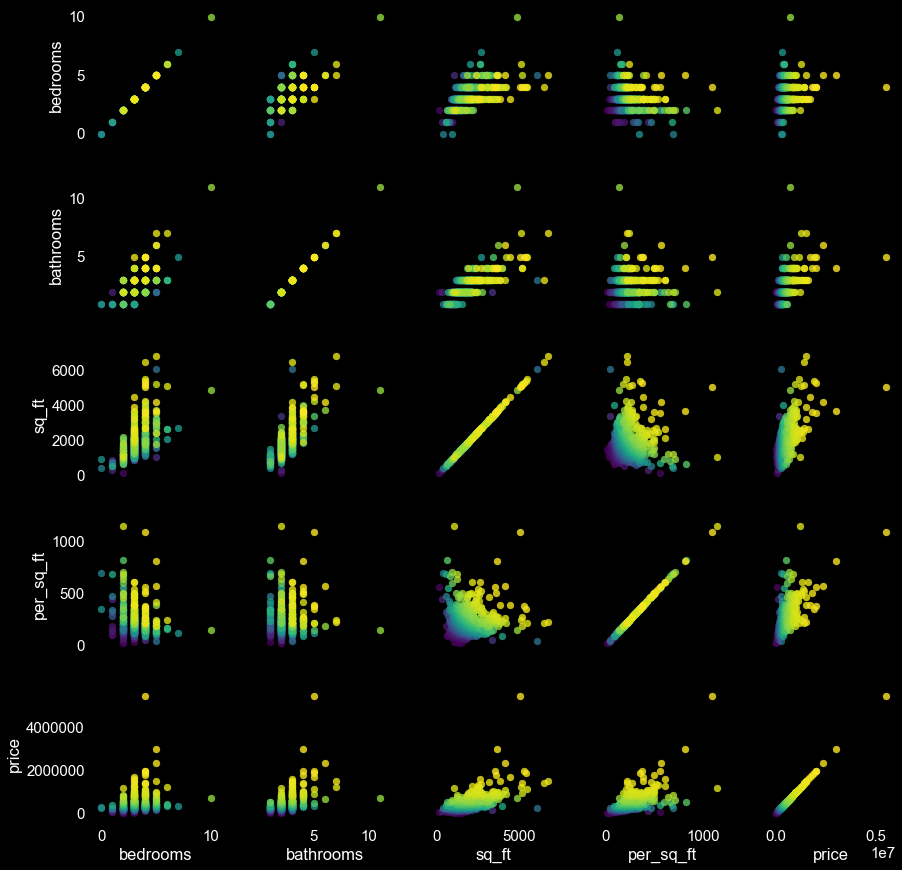

In [94]:
pair1 = sns.PairGrid(house,vars=['bedrooms','bathrooms','sq_ft','per_sq_ft','price'], hue='price', palette='viridis')
pair1.map(plt.scatter, alpha=0.8)
plt.show(pair1)

In [101]:
house.head()

location  bedrooms  bathrooms  sq_ft  per_sq_ft   price
0  arroyo_grande         3          3   2371     335.30  795000
1  arroyo_grande         5          2   1575     152.25  239800
2  arroyo_grande         1          1    748     334.22  250000
3  arroyo_grande         3          3   1568     255.10  400000
4  arroyo_grande         3          2   1916     234.86  450000

In [102]:
# I slice the location column which I will use later for reference

In [103]:
location_name = house.iloc[:,[0]]  

In [104]:
# looks good 

In [105]:
location_name.head(5) 

location
0  arroyo_grande
1  arroyo_grande
2  arroyo_grande
3  arroyo_grande
4  arroyo_grande

In [106]:
# I go ahead and change my location strings into type category and integers

In [107]:
house["location"] = house["location"].astype('category')

In [108]:
 # and attach it back onto my dataframe 

In [109]:
house["location"] = house["location"].cat.codes

In [110]:
# lets take a quick look 

In [111]:
house.head() 

location  bedrooms  bathrooms  sq_ft  per_sq_ft   price
0         0         3          3   2371     335.30  795000
1         0         5          2   1575     152.25  239800
2         0         1          1    748     334.22  250000
3         0         3          3   1568     255.10  400000
4         0         3          2   1916     234.86  450000

In [112]:
# and making sure my datatypes are good for further analysis 

In [113]:
house.dtypes 

location        int8
bedrooms       int64
bathrooms      int64
sq_ft          int64
per_sq_ft    float64
price          int64
dtype: object

In [114]:
# renaming location columns to location_code

In [115]:
house.rename(columns={'location': 'location_code'}, inplace = True) 

In [116]:
# bringing back that column I sliced from earlier with location name 

In [117]:
all_data = pd.concat([location_name,house], axis=1) 

In [118]:
# and now I have a nice dataframe to work with

In [119]:
all_data.head() 

location  location_code  bedrooms  bathrooms  sq_ft  per_sq_ft   price
0  arroyo_grande              0         3          3   2371     335.30  795000
1  arroyo_grande              0         5          2   1575     152.25  239800
2  arroyo_grande              0         1          1    748     334.22  250000
3  arroyo_grande              0         3          3   1568     255.10  400000
4  arroyo_grande              0         3          2   1916     234.86  450000

In [120]:
# another macro I have stored finds the min, max, mean, and count of your dataframe by groupby

In [121]:
%store -r _CMMM 

In [122]:
_CMMM

In [123]:
# here we look at the top ten locations by count, max, mean, and min values

In [124]:
def get_stats(group):
    return {'min': group.min(), 
            'max': group.max(),
            'count': group.count(), 
            'mean': group.mean()}
my_stats = all_data['price'].groupby(all_data['location']).apply(get_stats).unstack()
my_stats = my_stats.sort_values('max', ascending=False)
my_stats.head(10)

count        max          mean       min
location                                                 
arroyo_grande     40.0  5499000.0  6.801038e+05   54500.0
cambria           21.0  2995000.0  8.007476e+05  289900.0
san_luis_obispo   19.0  2369000.0  5.999161e+05  229000.0
avila_beach        3.0  1999000.0  1.205667e+06  779000.0
pismo_beach       20.0  1799000.0  7.178398e+05  275000.0
nipomo            37.0  1700000.0  4.325378e+05  122500.0
bradley            4.0  1600000.0  6.857250e+05  194900.0
cayucos            3.0  1500000.0  9.066667e+05  525000.0
templeton         12.0  1399000.0  6.894833e+05  305000.0
santa_ynez         5.0  1395000.0  8.818000e+05  525000.0

In [125]:
# we can put this on a graph - I have a pie chart macro for this purpose 

In [126]:
%store -r _pieGraph

In [127]:
_pieGraph

In [128]:
print(_pieGraph)

#font = {'serif' : 'normal', 'weight' : 'bold', 'size' : '18'}
#labels = ['_label_name','_label_name'..]
#sizes = ['_value_','_value_'...]
#colors = ['_red_','_blue_',...]

#plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
#plt.axis('equal')

#f = plt.gcf()
#f.set_size_inches(14,14)

#plt.xlabel('_TITLE_', fontsize=18, color='navy', labelpad=20)
#plt.show()



In [129]:
# lets go ahead and assign the data we are using 

In [130]:
a = my_stats.index[:10]
a

Index(['arroyo_grande', 'cambria', 'san_luis_obispo', 'avila_beach',
       'pismo_beach', 'nipomo', 'bradley', 'cayucos', 'templeton',
       'santa_ynez'],
      dtype='object', name='location')

In [131]:
b = my_stats['max'].head(10)

In [132]:
list(b)

[5499000.0,
 2995000.0,
 2369000.0,
 1999000.0,
 1799000.0,
 1700000.0,
 1600000.0,
 1500000.0,
 1399000.0,
 1395000.0]

In [133]:
# setting up the pie chart parameters and displaying the info plt.rcParams['text.color'] = 'white' fig.patch.set_facecolor('black')

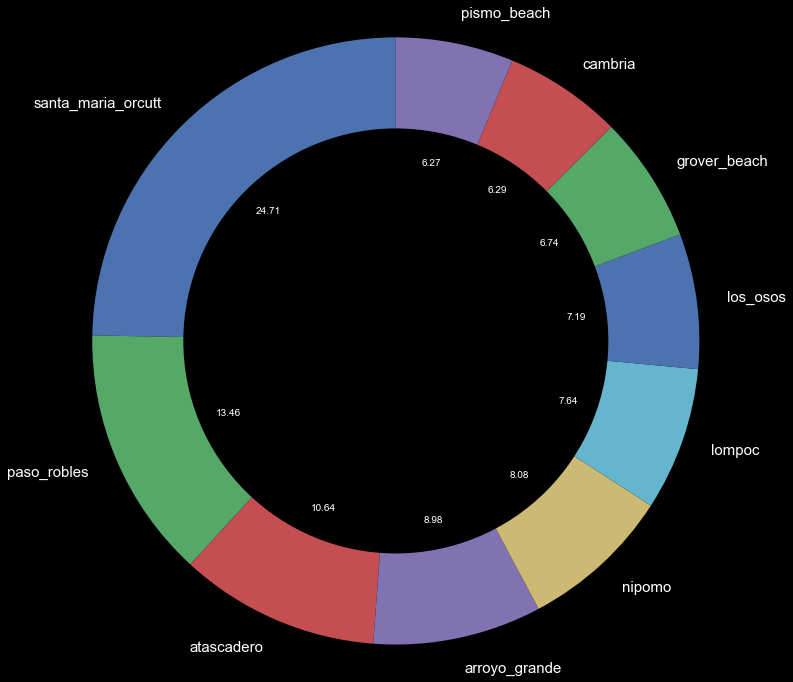

In [134]:
labels = ['santa_maria_orcutt', 'paso_robles', 'atascadero', 'arroyo_grande','nipomo', 'lompoc', 'los_osos', 'grover_beach', 'cambria','pismo_beach']
sizes =[5499000.0, 2995000.0,2369000.0,1999000.0,1799000.0,1700000.0,1600000.0,1500000.0,1399000.0,1395000.0]
plt.rcParams['text.color'] = 'white'
plt.rc('font', size='10')          
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%.2f', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='black')
plt.gcf()
fig1.patch.set_facecolor('black')
fig1.set_size_inches(12,12)
fig1.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.show()

In [135]:
plot1 = all_data.nlargest(10, 'price')
plot1

location  location_code  bedrooms  bathrooms  sq_ft  per_sq_ft  \
31     arroyo_grande              0         4          5   5060    1086.76   
132          cambria              6         5          4   3684     812.98   
435  san_luis_obispo             25         5          6   4174     567.56   
135          cambria              6         4          4   3576     559.28   
110      avila_beach              2         4          5   5307     376.67   
23     arroyo_grande              0         4          5   5411     351.14   
427      pismo_beach             24         4          4   3609     498.48   
298           nipomo             20         3          5   4463     380.91   
112          bradley              4         3          3   2640     606.06   
151          cayucos              7         3          3   3880     386.60   

       price  
31   5499000  
132  2995000  
435  2369000  
135  2000000  
110  1999000  
23   1900000  
427  1799000  
298  1700000  
112  1600000  
151  1500000

In [136]:
list(plot1['location'])

['arroyo_grande',
 'cambria',
 'san_luis_obispo',
 'cambria',
 'avila_beach',
 'arroyo_grande',
 'pismo_beach',
 'nipomo',
 'bradley',
 'cayucos']

In [137]:
X = plot1.iloc[:,6].astype('int')
y = plot1.iloc[:,4].astype('int')

In [138]:
y

31     5060
132    3684
435    4174
135    3576
110    5307
23     5411
427    3609
298    4463
112    2640
151    3880
Name: sq_ft, dtype: int64

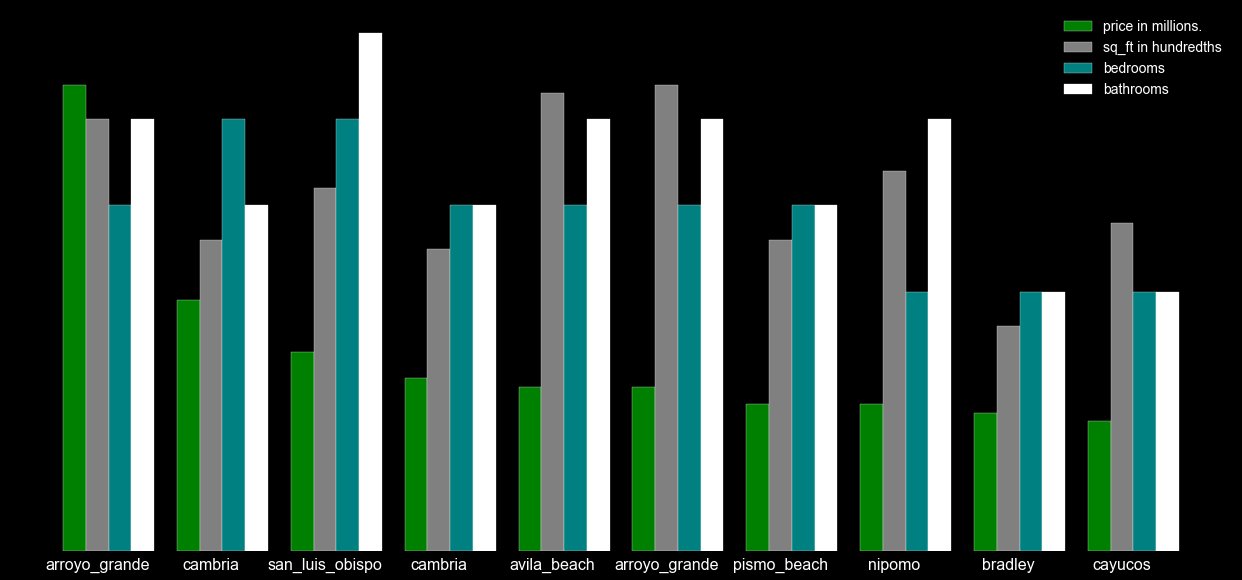

In [143]:
barWidth = 0.2
bar1 = [5.4,2.9,2.3,2.0,1.9,1.9,1.7,1.7,1.6,1.5]
bar2 = [5.0, 3.6, 4.2, 3.5, 5.3, 5.4, 3.6, 4.4, 2.6, 3.8]
bar3 =[4, 5, 5, 4, 4, 4, 4, 3, 3, 3]
bar4 = [5, 4, 6, 4, 5, 5, 4, 5, 3, 3]

r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.rcParams['axes.facecolor'] = 'black'
plt.figure(figsize=(22,10))
plt.bar(r1, bar1, color='green', width=barWidth, edgecolor='white', label='price in millions.')
plt.bar(r2, bar2, color='gray', width=barWidth, edgecolor='white', label='sq_ft in hundredths')
plt.bar(r3, bar3, color='teal', width=barWidth, edgecolor='white', label='bedrooms')
plt.bar(r4, bar4, color='white', width=barWidth, edgecolor='white', label='bathrooms')
 
plt.yticks([])
plt.xticks([r + barWidth for r in range(len(bar1))], ['arroyo_grande','cambria','san_luis_obispo','cambria','avila_beach','arroyo_grande',
                                                      'pismo_beach','nipomo','bradley','cayucos'], fontsize=16)

plt.legend(fontsize=14)
plt.show()

In [140]:
# lets see where the most homes are located

In [328]:
a = all_data.location.value_counts() 

In [329]:
# looks like santa maria orcutt and paso robles are pretty popular 

In [330]:
pd.DataFrame(a).reset_index().sort_values('location', ascending=False) 

index  location
0   santa_maria_orcutt       278
1          paso_robles       100
2           atascadero        68
3        arroyo_grande        40
4               nipomo        37
5             los_osos        27
6               lompoc        27
7         grover_beach        22
8              cambria        21
9          pismo_beach        20
10     san_luis_obispo        19
11           morro_bay        17
12          san_miguel        13
13            buellton        12
14           templeton        12
15              oceano        10
16             solvang        10
17            coalinga         7
18          santa_ynez         5
19             bradley         4
20           guadalupe         4
21             cayucos         3
22          los_alamos         3
23         avila_beach         3
24             soledad         3
25           king_city         3
26             creston         2
27         bakersfield         1
28            lockwood         1
29          san_simeon         1
30               ocean         1
31     santa_margarita         1
32          new_cayuma         1
33          greenfield         1

In [331]:
# lets create a proper index for the dataframe we are focused on 

In [332]:
b = a.reset_index() 
b.head()

index  location
0  santa_maria_orcutt       278
1         paso_robles       100
2          atascadero        68
3       arroyo_grande        40
4              nipomo        37

In [333]:
# some renaming magic 

In [334]:
b.rename(columns={'location':'count'}, inplace = True) 

In [335]:
# I want percentages of my totaled values so I calculate them maually here - loving python right now :)

In [336]:
c = b['count'] 

In [337]:
d= c/781*100 

In [338]:
e = round(d,1) 

In [339]:
# and here are our percentages 

In [340]:
f = pd.concat([b,e], axis=1) 
f.head()

index  count  count
0  santa_maria_orcutt    278   35.6
1         paso_robles    100   12.8
2          atascadero     68    8.7
3       arroyo_grande     40    5.1
4              nipomo     37    4.7

In [341]:
# here is the dataframe with just the percent value 

In [342]:
g = f.iloc[:,[0,2]] 
g.head()

index  count
0  santa_maria_orcutt   35.6
1         paso_robles   12.8
2          atascadero    8.7
3       arroyo_grande    5.1
4              nipomo    4.7

In [343]:
# dataframes are boring - lets visualize! - regular plots are boring - so lets bring in some real images because... we can :)
# here is the link to install imread - https://pypi.org/project/imread/ - imread simply reads image files 
# image credit - Photo by frank mckenna on Unsplash 
# Unsplash has tons of images you can download and use freely, check it out - the image I used is of a socal beach 

In [344]:
from scipy.misc import imread 

In [345]:
# assign our X and y

In [346]:
X = g['index'] 
y = g['count']

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning:

`imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.



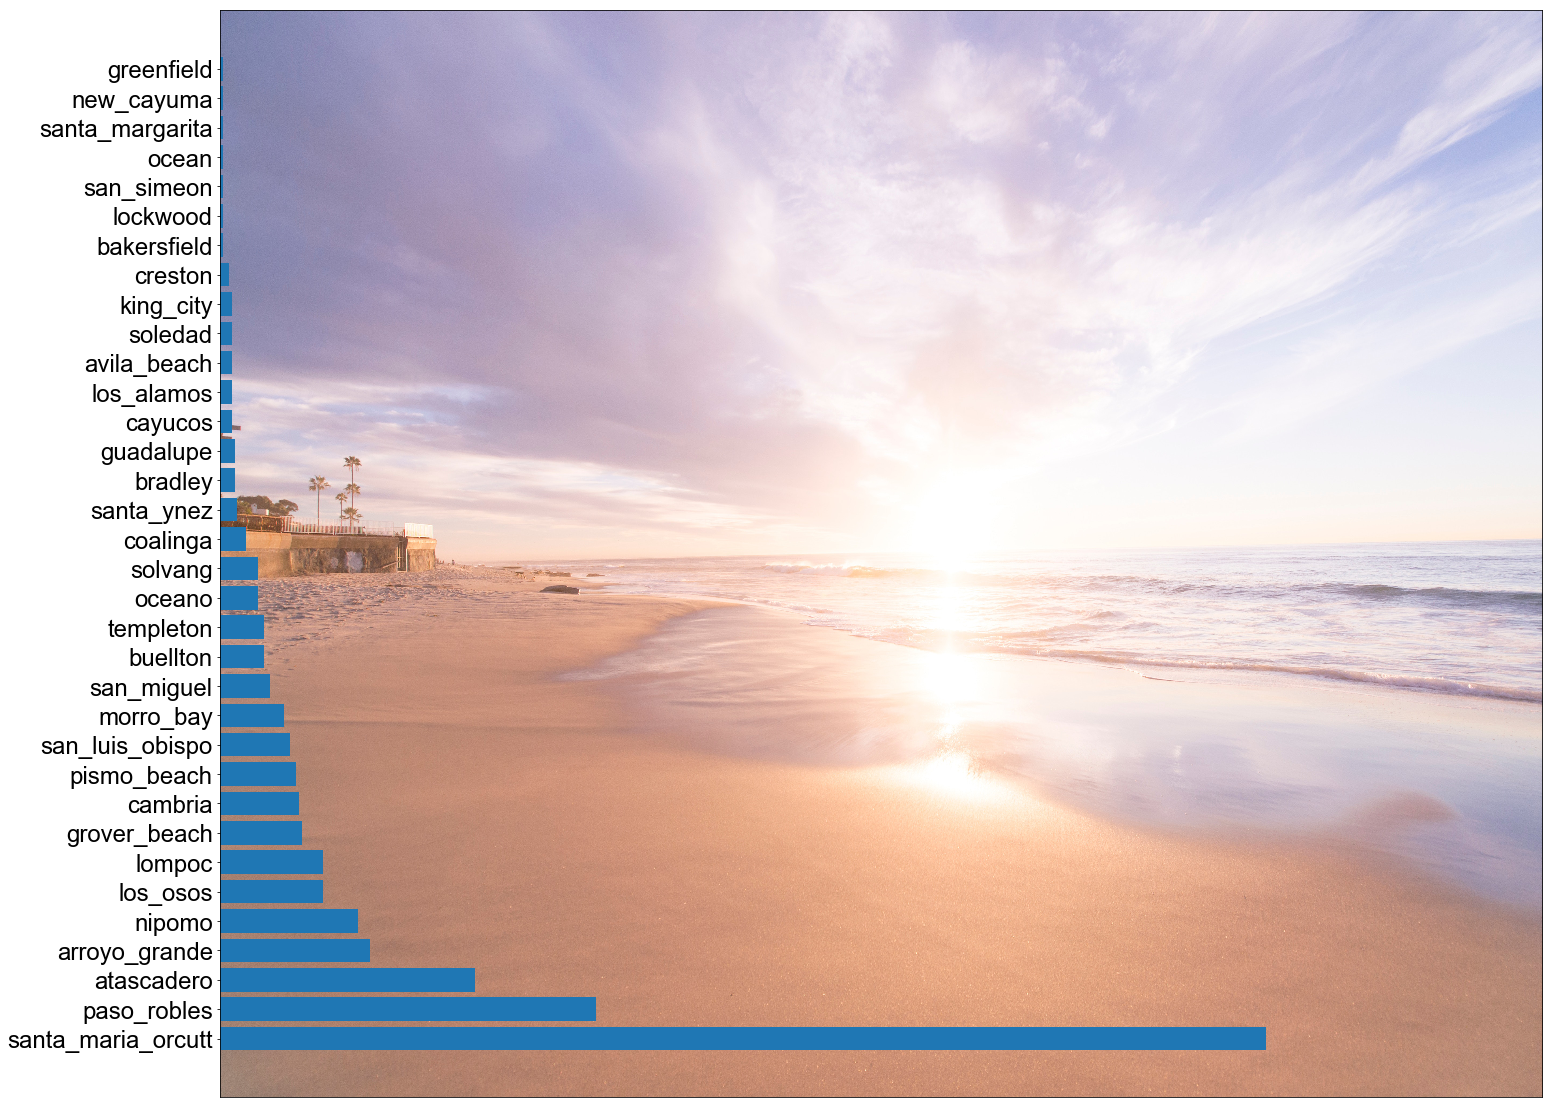

In [347]:
pic = imread('/Users/TJR/Desktop/house_data/f_m_upsplash_beach.jpg') # imread assist with importing image files 
plt.rc('ytick', labelsize=24)  # setting some font parameters 
plt.rc('font', family='arial') # more font specs 
plt.figure(figsize=(26,20)) # setting a proper figure size 
plt.barh(X,y, align='center') # using matplotlib to create a horizontal bar chart 
plt.xticks([]) # supressing xticks 
plt.imshow(pic,extent=[0.0, 45, -2, 35]) # here yu have to set the parameters for the image - left to right then bottom to top 
plt.show() 

In [348]:
# doesnt that look spectacular?! - why stop there? lets check out the locations of these homes on a real map 

In [349]:
# we need longitude and latitude informatiuon for our locations - # I have created a seperate file for this information - a simple latitude/longitude generator
# works well in this case - here is one I use - https://www.latlong.net/ 

In [350]:
locate = pd.read_csv('/Users/TJR/Desktop/house_data/locations.csv') 
locate.head()

city  homes   Latitude   Longitude
0  santa_maria_orcutt    278  34.873670 -120.412492
1         paso_robles    100  33.730087 -117.769540
2          atascadero     68  35.393431 -120.604930
3              nipomo     37  35.036848 -120.482928
4       arroyo_grande     40  35.129715 -120.600332

In [351]:
#folium is an excellent package for easily importing and projecting maps and plotting data - installation info. here - https://anaconda.org/ioos/folium 
# I have my folium import part of my macros 

In [352]:
# below I visualize the location of each city relative to each other 

In [353]:
sl_map = folium.Map(location=[35.1866,-120.5689],zoom_start='8',tiles='Stamen Terrain')

folium.Marker([34.873670,-120.412492],
              popup='Santa Maria Orcutt - 278 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([35.036848,-120.482928],
              popup='Nipomo - 37 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([35.129715,-120.600332],
              popup='Arroyo Grande - 40 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([34.645219,-120.46491],
              popup='Lompoc - 27 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([35.119906,-120.616134],
              popup='Grover Beach - 22 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)         
folium.Marker([35.6161, -120.6846],
              popup='Paso Robles - 85 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([35.4816,-120.6555],
              popup='Atascadero - 68 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([35.3111,-120.8324],
              popup='Los Osos - 27 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([35.5514,-121.0882],
              popup='Cambria - 21 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([35.1427,-120.6413],
              popup='Pismo Beach - 20 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([35.2725,-120.6704],
              popup='San Luis Obispo - 19 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([35.3781,-120.8718],
              popup='Morro Bay - 17 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([35.750800,-120.695200],
              popup='San Miguel - 13 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([34.617600,-120.193600],
              popup='Buellton - 12 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([35.549000,-120.706100],
              popup='Templeton - 12 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([35.105865,-120.626747],
              popup='Oceano - 10 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([34.584800,-120.137400],
              popup='Solvang - 10 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([36.160900,-120.294200],
              popup='Coalinga - 7 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([34.608600,-120.095900],
              popup='Santa Ynez - 5 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([35.863300,-120.800700],
              popup='Bradley - 4 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([34.960100,-120.574500],
              popup='Guadalupe - 4 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([35.437000,-120.893700],
              popup='Cayucos - 3 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([36.212700,-121.126000],
              popup='King City - 3 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([36.41990,-121.346900],
              popup='Soledad - 3 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([35.180000,-120.731800],
              popup='Avila Beach - 3 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([35.518900	-120.523800],
              popup='Los Alamos - 3 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([34.738000,-120.275300],
              popup='Creston - 2 Homes',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([36.320800,-121.243800],
              popup='Greenfield - 1 Home',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([34.944600,-119.683800],
              popup='New Cayuma - 1 Home',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([35.944100,-121.083300],
              popup='Lockwood - 1 Home',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([35.621000,-121.199300],
              popup='San Simeon - 1 Home',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([35.390000,-120.609100],
              popup='Santa Margarita - 1 Home',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)
folium.Marker([35.321100,-119.018700],
              popup='Bakersfield - 1 Home',
              icon=folium.Icon(color='blue',icon='home')).add_to(sl_map)

sl_map.save('sl_map.html') # to access the map .html

In [354]:
sl_map

In [355]:
# lets check out where the top ten most expensive and inexpensive homes are located 
# I do a groupby price and call pr. tail and .head to give me the top ten highest and lowest values 

In [356]:
pr = all_data.groupby('price').sum(ascending=False)

In [357]:
pr.head()

location  location_code  bedrooms  bathrooms  sq_ft  \
price                                                                  
26500  santa_maria_orcutt             29         2          2   1344   
29000  santa_maria_orcutt             29         2          2   1500   
36000  santa_maria_orcutt             29         2          2   1056   
40900          new_cayuma             19         3          1   1201   
54500       arroyo_grande              0         2          1    624   

       per_sq_ft  
price             
26500      19.72  
29000      19.33  
36000      34.09  
40900      34.05  
54500      87.34

In [358]:
pr.tail()

location  location_code  bedrooms  bathrooms  sq_ft  per_sq_ft
price                                                                         
1999000      avila_beach              2         4          5   5307     376.67
2000000          cambria              6         4          4   3576     559.28
2369000  san_luis_obispo             25         5          6   4174     567.56
2995000          cambria              6         5          4   3684     812.98
5499000    arroyo_grande              0         4          5   5060    1086.76

In [359]:
price = folium.Map(location=[35.1866,-120.5689],zoom_start=9, tiles='Stamen Terrain')

folium.Marker([35.129715,-120.600332],
              popup='Arroyo Grande - $5,499,000',
              icon=folium.Icon(color='darkred',icon='usd')).add_to(price)
folium.Marker([35.5514,-121.0882],
              popup='Cambria - $2,995,000',
              icon=folium.Icon(color='darkred',icon='usd')).add_to(price)
folium.Marker([35.2725,-120.6704],
              popup='San Luis Obispo - $2,369,000',
              icon=folium.Icon(color='red',icon='usd')).add_to(price)
folium.Marker([35.5000,-121.0882],
              popup='Cambria - $2,000,000',
              icon=folium.Icon(color='red',icon='usd')).add_to(price)
folium.Marker([35.180000,-120.731800],
              popup='Avila Beach - $1,999,000',
              icon=folium.Icon(color='red',icon='usd')).add_to(price)

folium.Marker([35.129715,-120.4901],
              popup='Arroyo Grande - $54,000',
              icon=folium.Icon(color='cadetblue',icon='usd')).add_to(price)
folium.Marker([34.944600,-119.683800],
              popup='New Cayuma - $49,000',
              icon=folium.Icon(color='cadetblue',icon='usd')).add_to(price)
folium.Marker([34.873670,-120.412492],
              popup='Santa Maria Orcutt - $36,000',
              icon=folium.Icon(color='cadetblue',icon='usd')).add_to(price)
folium.Marker([34.9425,-120.5003],
              popup='Santa Maria Orcutt - $29,000',
              icon=folium.Icon(color='blue',icon='usd')).add_to(price)
folium.Marker([34.9420,-120.3880],
              popup='Santa Maria Orcutt - $26,500',
              icon=folium.Icon(color='blue',icon='usd')).add_to(price)

price.save('price.html') # access the map .html

price

In [360]:
# San Luis Obispo County definitely has higher value homes compared to Santa Barbara 
# for the next visualization, everything needs to be an array - so we slice to array 

In [361]:
pop = locate.iloc[:,1] 
pop = np.array(pop)
pop2 = pop*7 # I multiplied by 7 to assist with the visualization below 
pop2

array([1946,  700,  476,  259,  280,  189,  189,  154,  147,  140,  133,
        119,   91,   84,   84,   70,   70,   49,   35,   28,   28,   21,
         21,   21,   21,   21,   14,    7,    7,    7,    7,    7,    7])

In [362]:
 # quick type check 

In [363]:
type(pop) 

numpy.ndarray

In [364]:
lo = locate.iloc[:,2] 
lo = np.array(lo)

In [365]:
lo

array([34.87367 , 33.730087, 35.393431, 35.036848, 35.129715, 34.645219,
       35.3111  , 35.119906, 35.5514  , 35.1427  , 35.2725  , 35.3781  ,
       35.7508  , 34.6176  , 35.549   , 35.105865, 34.5848  , 36.1609  ,
       34.6086  , 35.8633  , 34.9601  , 35.437   , 36.2127  , 36.4199  ,
       35.18    , 34.738   , 35.5189  , 36.3208  , 34.9446  , 35.9441  ,
       35.621   , 35.39    , 35.3211  ])

In [366]:
type(lo) 

numpy.ndarray

In [367]:
la = locate.iloc[:,3] 
la = np.array(la)

In [368]:
la

array([-120.412492, -117.76954 , -120.60493 , -120.482928, -120.600332,
       -120.46491 , -120.8324  , -120.616134, -121.0882  , -120.6413  ,
       -120.6704  , -120.8718  , -120.6952  , -120.1936  , -120.7061  ,
       -120.626747, -120.1374  , -120.2942  , -120.0959  , -120.8007  ,
       -120.5745  , -120.8937  , -121.126   , -121.3469  , -120.7318  ,
       -120.2753  , -120.5238  , -121.2438  , -119.6838  , -121.0833  ,
       -121.1993  , -120.6091  , -119.0187  ])

In [369]:
type(la) 

numpy.ndarray

In [370]:
import json 
import codecs
import shapefile
from mpl_toolkits.basemap import Basemap
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

In [371]:
# basemap is a great tool for plotting maps and creating map projections - there are many ways to do this - below I use arcgis as my map layer 

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=5593064.611638928,1874193.3515885337,6413737.612364243,2550692.4611209393&bboxSR=2229&imageSR=2229&size=1500,1236&dpi=96&format=png32&f=image


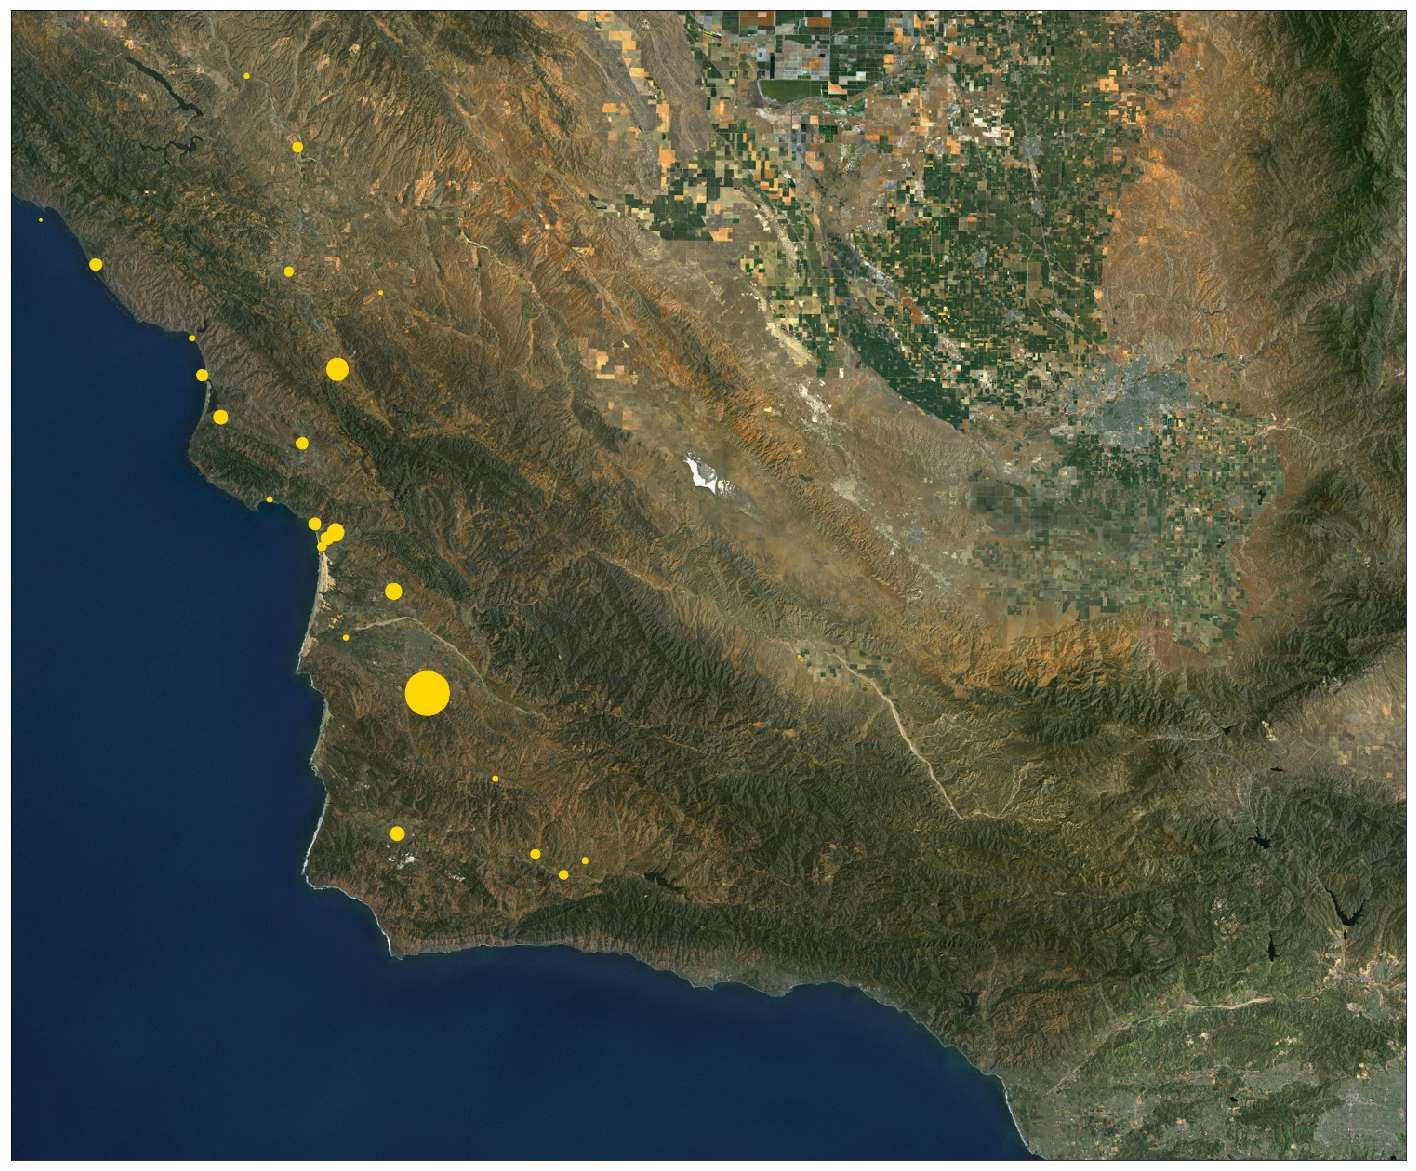

In [372]:
plt.figure(figsize=(25,25)) # setting a proper size 

m = Basemap(llcrnrlon=-121.2, llcrnrlat=34.1, urcrnrlon=-118.5, urcrnrlat=36.0, epsg=2229) # Basemap uses longitude and latitude 

m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)

# here are the arguments
#llcrnrlon -The lower left corner geographical longitude
#llcrnrlat-The lower left corner geographical latitude
#urcrnrlon-The upper right corner geographical longitude
#urcrnrlat-The upper right corner geographical latitude

x,y = m(la,lo)   # assian x and y 
plt.scatter(x,y, c='gold',s=pop2) # plot our data - assign gold as our color - size is the population 
plt.show()

In [ ]:
# lets model - here are some imports I may need to use 

In [374]:
# assign X and y

In [375]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X = house[['bedrooms','bathrooms','sq_ft','per_sq_ft']] 
y = house['price'] # assign y 

In [376]:
# fit

In [377]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [378]:
# predictions

In [379]:
predictions = lr.predict(X) # .predict predicts the y variable 
predictions[0:5]

array([778273.73557034, 197421.38611748, 360177.89019961, 425192.11127505,
       460907.34265414])

In [380]:
# score 

In [381]:
score = lr.score(X,y)
print ("The model produces an accuracy score of {:.2f} percent".format(score*100))

The model produces an accuracy score of 82.62 percent


In [382]:
print (lr.intercept_)
print (lr.coef_);

-457707.6598266524
[-11311.53346163  14309.30893512    252.66653131   1872.69825006]


In [383]:
# lets train and test 

In [384]:
X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                                    test_size = .25,
                                                   random_state = 3)

In [385]:
# scores look good 

In [386]:
lr = LinearRegression()
lr.fit(X_train, y_train)
#Test model on training data
train_score = lr.score(X_train, y_train)
print ("Training R2 score is {}".format(train_score))
#Test model on testing data
test_score = lr.score(X_test, y_test)
print ("Testing R2 score is {}".format(test_score))

Training R2 score is 0.8478856708043556
Testing R2 score is 0.7854485357597112


In [387]:
# we can try the same model using statsmodel 

In [388]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='price ~ bedrooms + bathrooms + sq_ft + per_sq_ft', data=house).fit()
lm.params

Intercept   -457707.659827
bedrooms     -11311.533462
bathrooms     14309.308935
sq_ft           252.666531
per_sq_ft      1872.698250
dtype: float64

In [389]:
lm.pvalues

Intercept     2.589619e-65
bedrooms      1.682554e-01
bathrooms     1.484544e-01
sq_ft         7.772834e-98
per_sq_ft    3.569205e-187
dtype: float64

In [390]:
lm.rsquared

0.8261511763421703

In [391]:
# sq_ft appears to have the most statistical value 
# our model intreprets 82% of the variance 
# for each unit increase of one sq_ft our price increases by 252.7 

In [392]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     917.2
Date:                Fri, 15 Jun 2018   Prob (F-statistic):          1.63e-291
Time:                        11:18:27   Log-Likelihood:                -10338.
No. Observations:                 777   AIC:                         2.069e+04
Df Residuals:                     772   BIC:                         2.071e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.577e+05   2.43e+04    -18.819      0.000   -5.05e+05    -4.1e+05
bedrooms   -1.131e+04   8201.959     -1.379      0.168   -2.74e+04    4789.253
bathrooms   1.431e+04   9892.648      1.446      0.148   -5110.371    3.37e+04
sq_ft        252.6665     10.361     24.386      0.000     232.327     273.006
per_sq_ft   1872.6983     47.484     39.439      0.000    1779.486    1965.911
==============================================================================
Omnibus:                     1085.048   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           660785.847
Skew:                           7.055   Prob(JB):                         0.00
Kurtosis:                     145.166   Cond. No.                     9.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""